In [21]:
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
gym = pd.read_csv("C:/Users/josen/Documents/MASTER/TFM/Datasets/gym_ids.csv")
members = pd.read_csv("C:/Users/josen/Documents/MASTER/TFM/Datasets/members_ids.csv")

In [23]:
# Análisis exploratorio de los datasets gym y members

# Información general de los datasets
print("Información general de 'gym':")
print(gym.info())
print("\nDescripción estadística de 'gym':")
print(gym.describe(include='all'))

print("\nInformación general de 'members':")
print(members.info())
print("\nDescripción estadística de 'members':")
print(members.describe(include='all'))

Información general de 'gym':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          2545 non-null   object
 1   Type           2545 non-null   object
 2   BodyPart       2545 non-null   object
 3   Equipment      2545 non-null   object
 4   Level          2545 non-null   object
 5   BodyGroup      2545 non-null   object
 6   exercise_id    2545 non-null   object
 7   goal_tag       2545 non-null   object
 8   movement_type  2545 non-null   object
 9   equipment_std  2545 non-null   object
dtypes: object(10)
memory usage: 199.0+ KB
None

Descripción estadística de 'gym':
                                        Title      Type    BodyPart  \
count                                    2545      2545        2545   
unique                                   2536         1          17   
top     Band-suspended kettlebell bench press  Stre

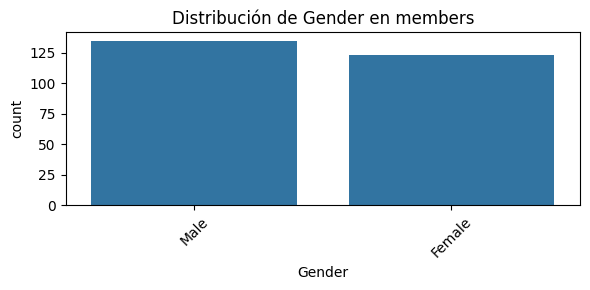

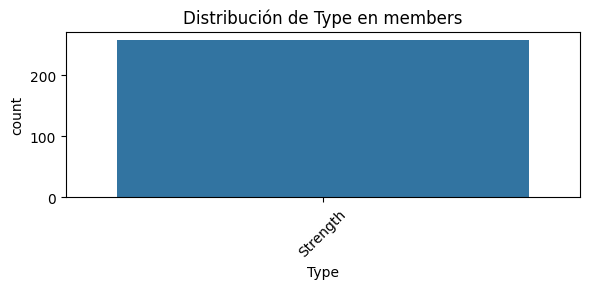

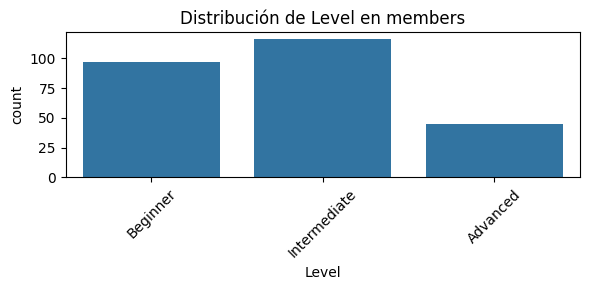

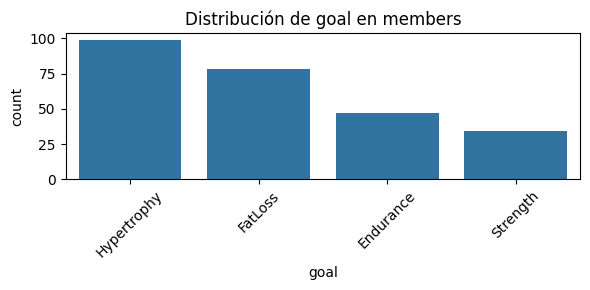

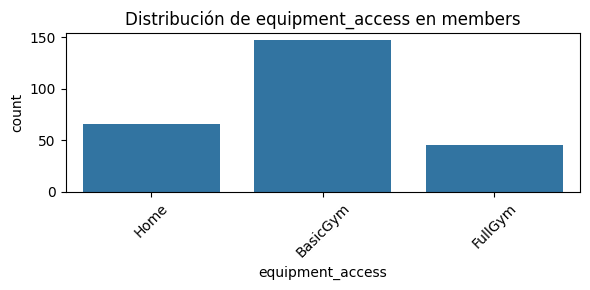

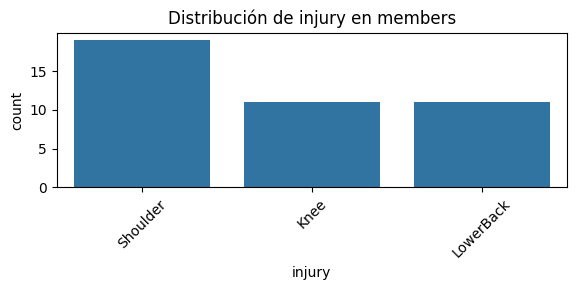

In [ ]:
for col in members.select_dtypes(include='object').columns:
    if col == 'member_id':
        continue  
    plt.figure(figsize=(6,3))
    sns.countplot(data=members, x=col)
    plt.title(f'Distribución de {col} en members')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

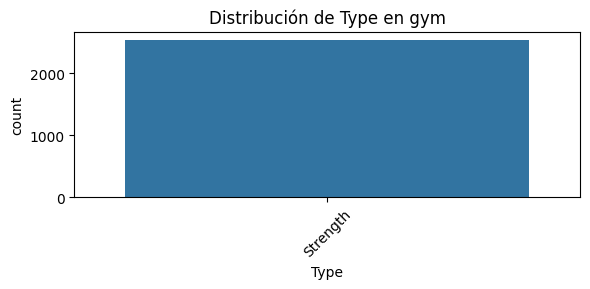

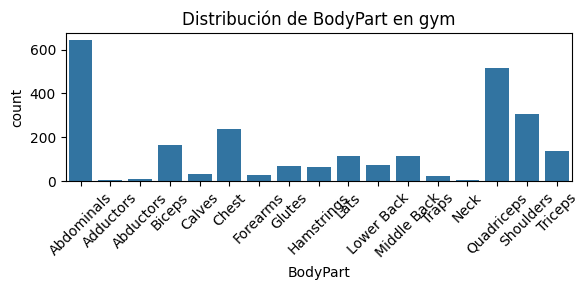

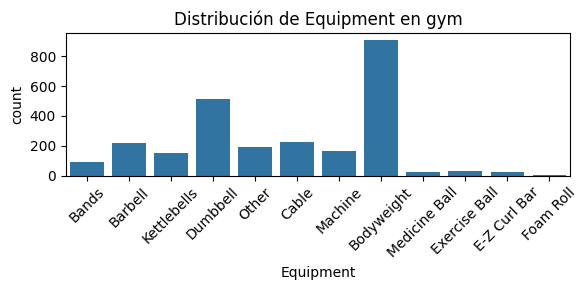

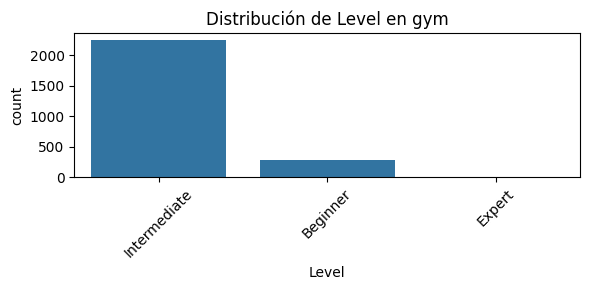

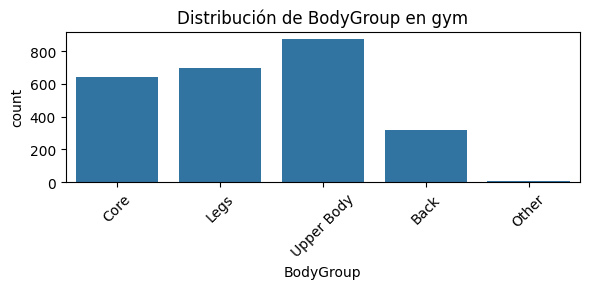

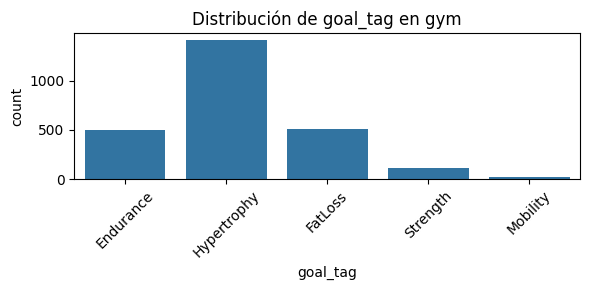

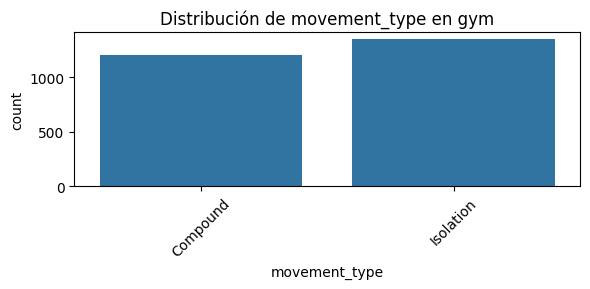

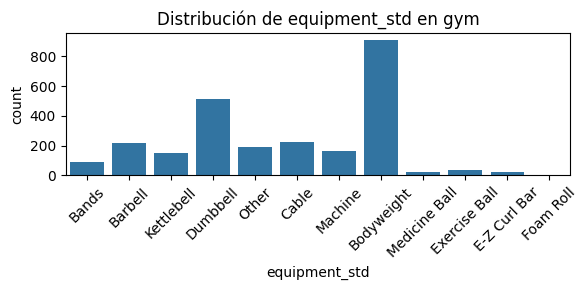

In [ ]:
for col in gym.select_dtypes(include='object').columns:
    if col in ['Title', 'exercise_id']:
        continue  
    plt.figure(figsize=(6,3))
    sns.countplot(data=gym, x=col)
    plt.title(f'Distribución de {col} en gym')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Variables comunes entre ambos datasets: {'Level', 'Type'}


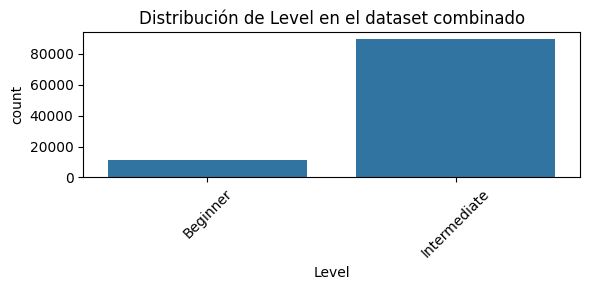

In [26]:
# Relación entre variables comunes

common_cols = set(members.columns).intersection(set(gym.columns))
print(f"Variables comunes entre ambos datasets: {common_cols}")

for col in common_cols:
    if col in SL.columns:
        plt.figure(figsize=(6,3))
        sns.countplot(x=col, data=SL)
        plt.title(f'Distribución de {col} en el dataset combinado')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

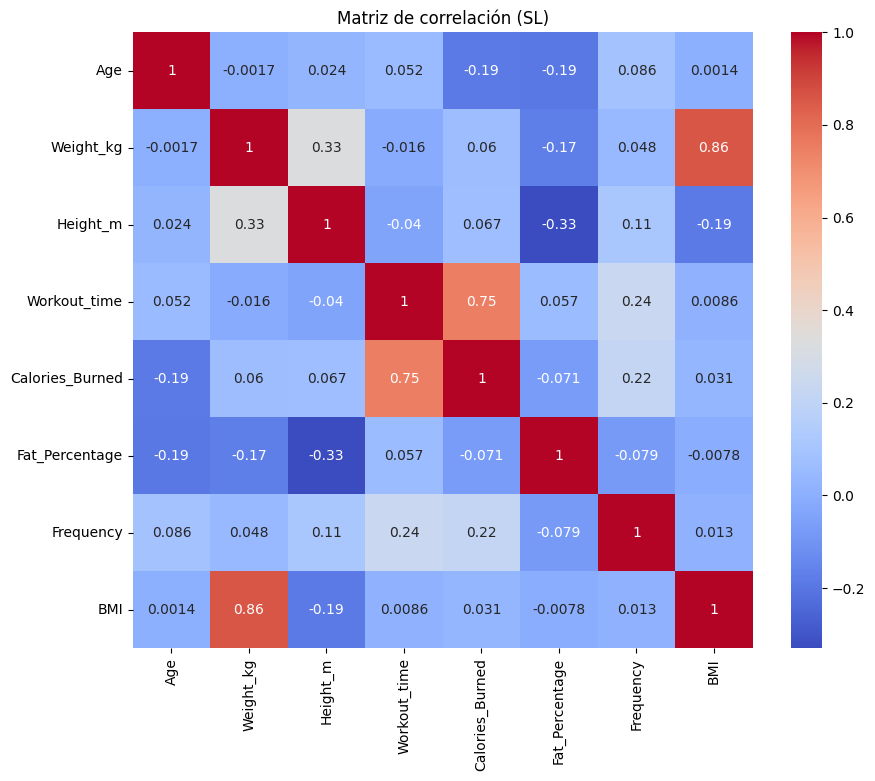

In [27]:
# Matriz de correlación para variables numéricas del dataset combinado
plt.figure(figsize=(10,8))
sns.heatmap(SL.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación (SL)')
plt.show()

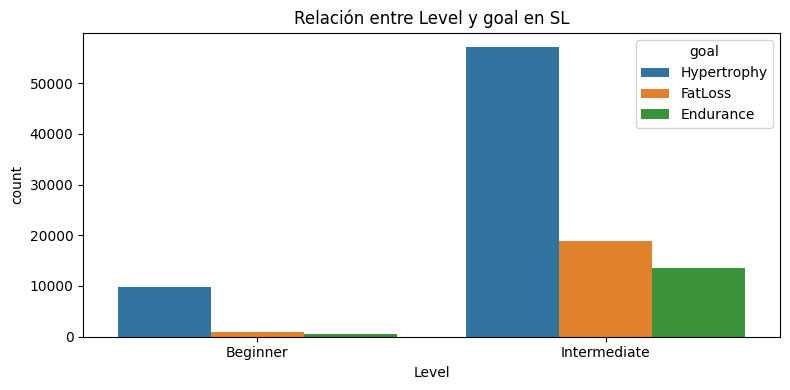

In [28]:
# Relación entre Level y goal en el dataset combinado
plt.figure(figsize=(8,4))
sns.countplot(data=SL, x='Level', hue='goal')
plt.title('Relación entre Level y goal en SL')
plt.tight_layout()
plt.show()

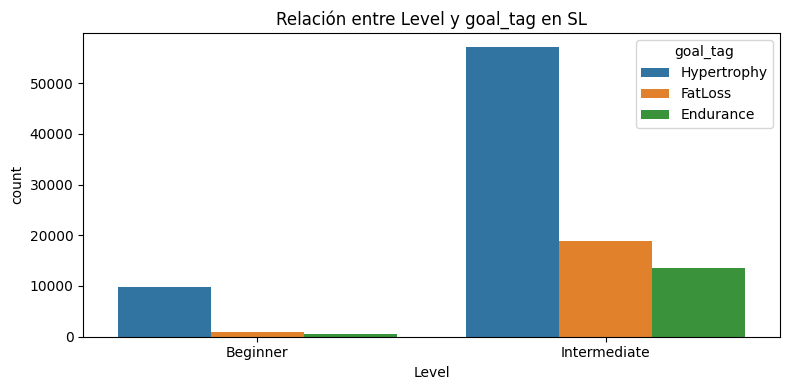

In [29]:
# Relación entre Level y goal_tag en el dataset combinado
if 'goal_tag' in SL.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=SL, x='Level', hue='goal_tag')
    plt.title('Relación entre Level y goal_tag en SL')
    plt.tight_layout()
    plt.show()

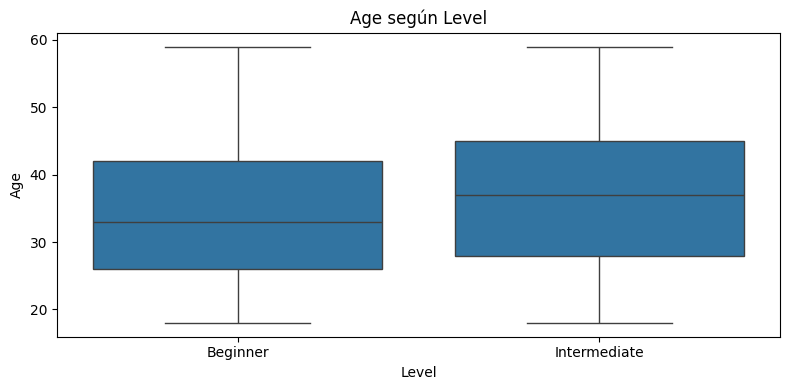

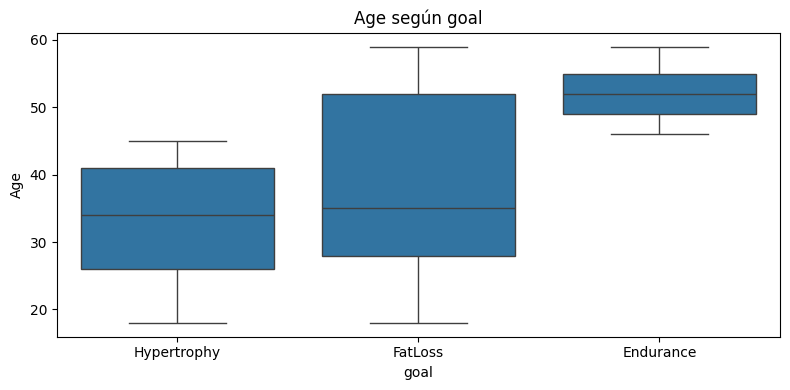

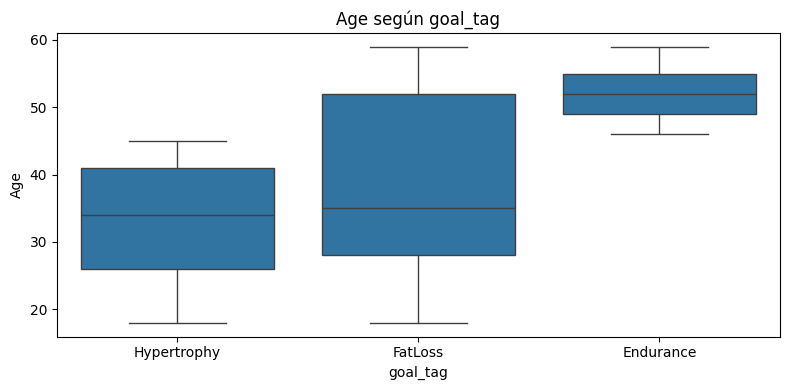

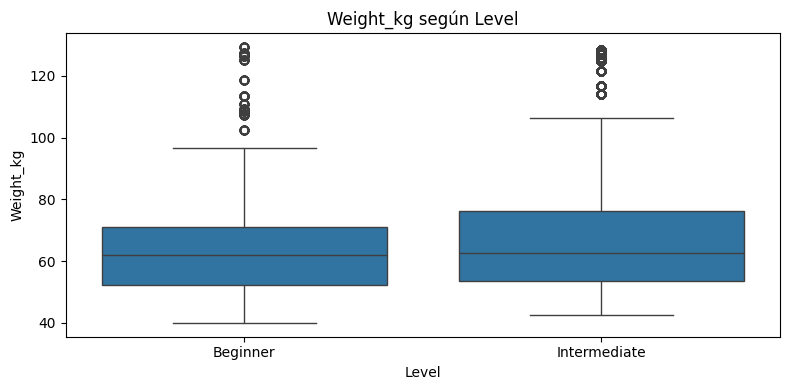

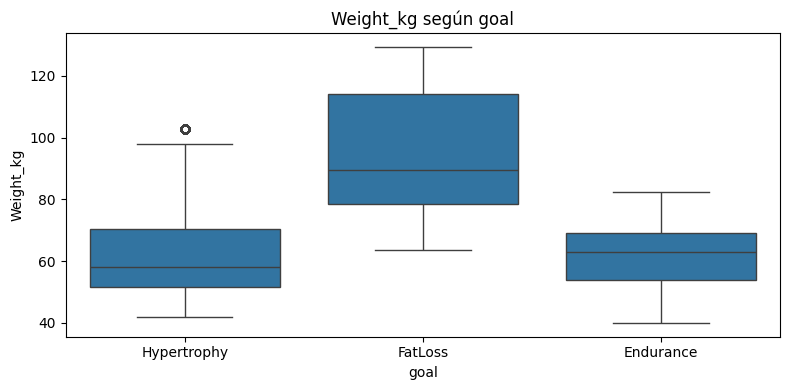

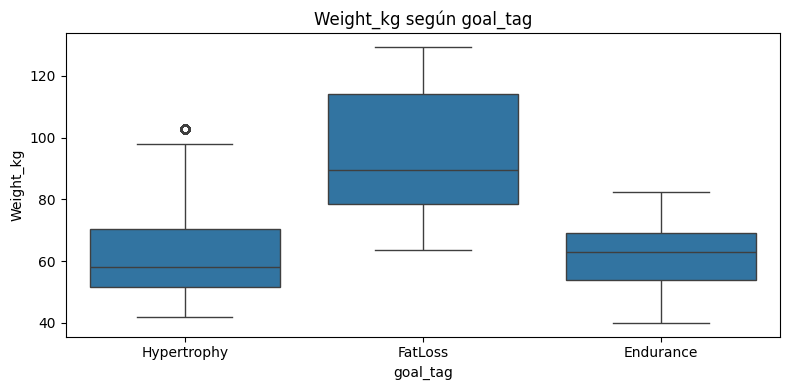

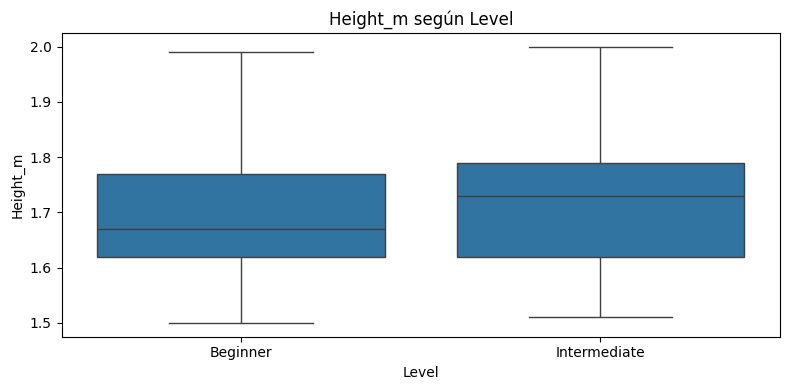

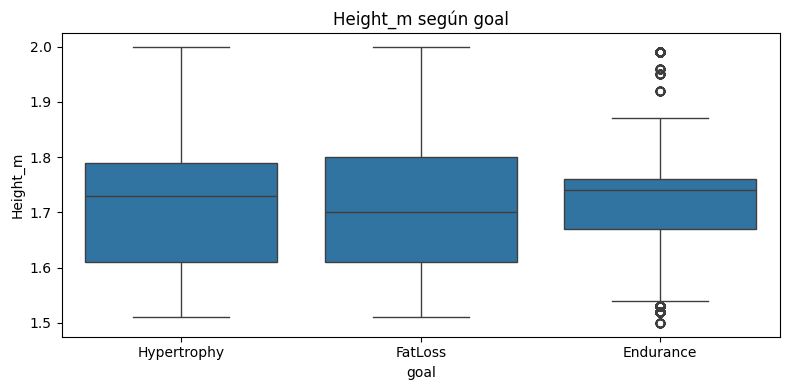

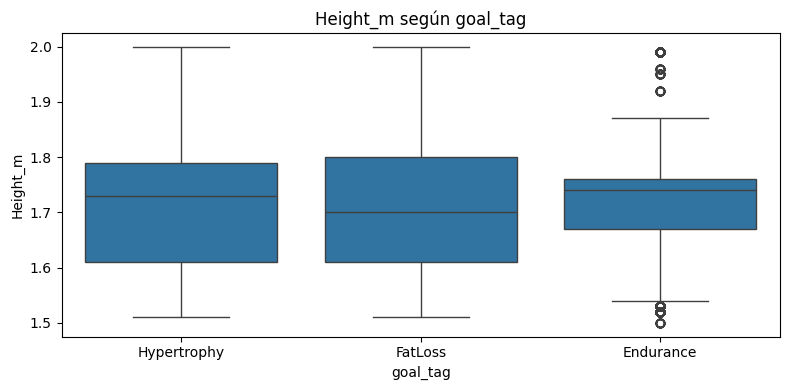

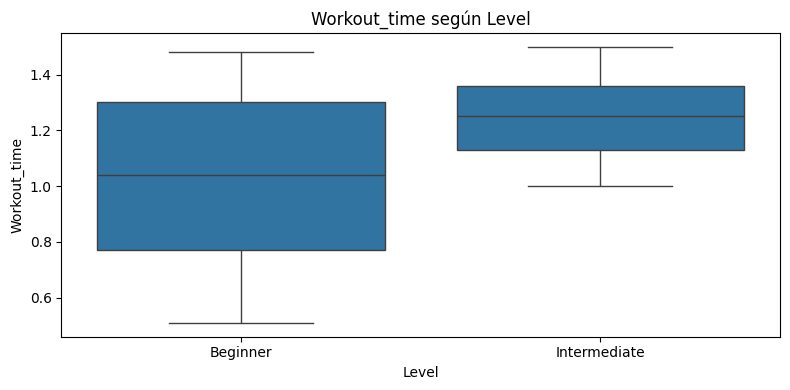

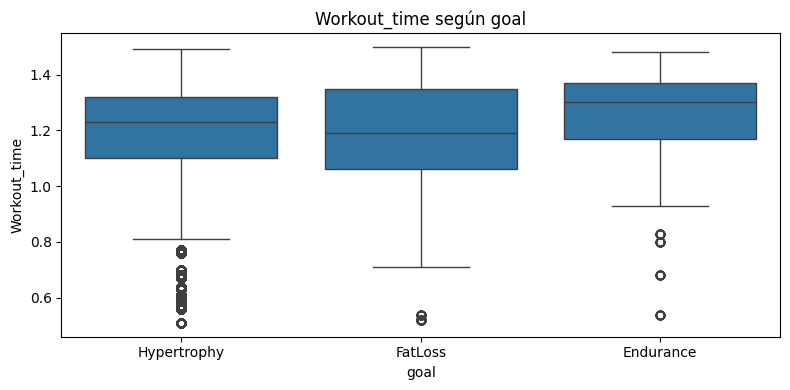

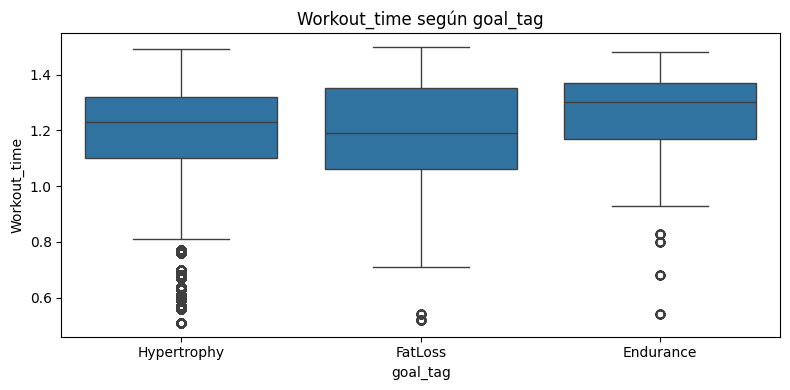

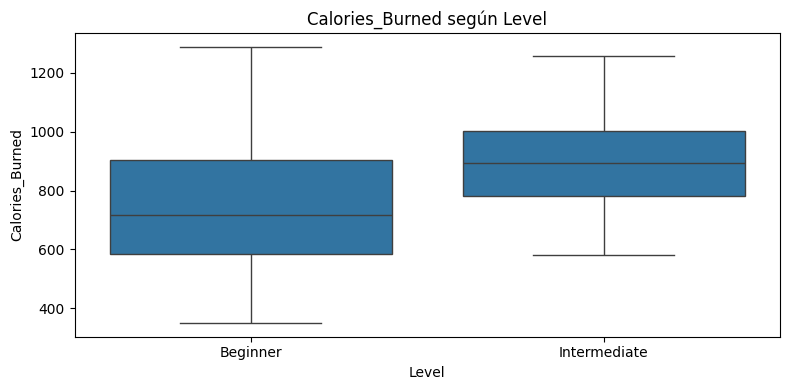

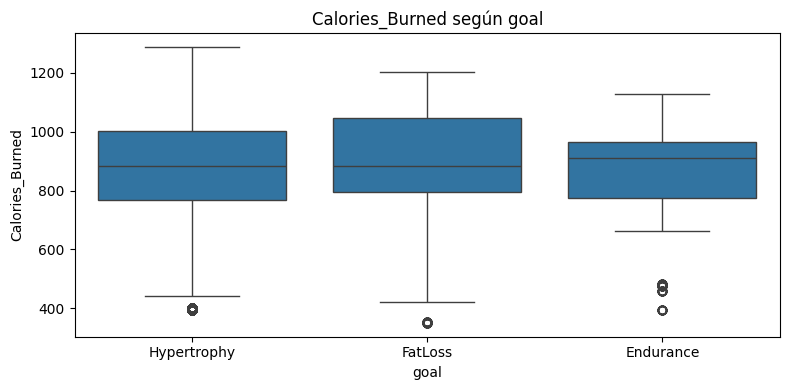

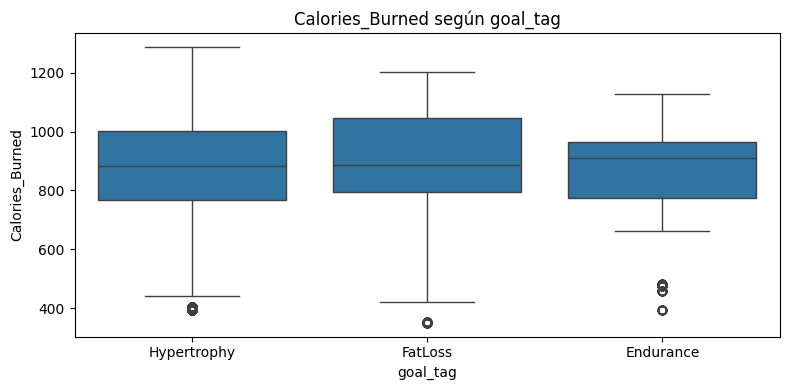

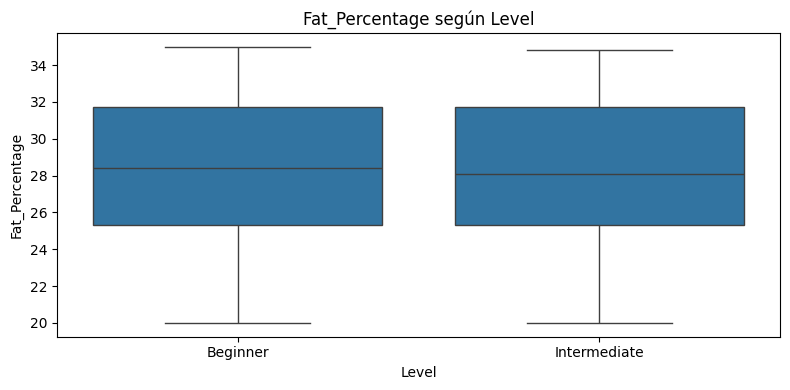

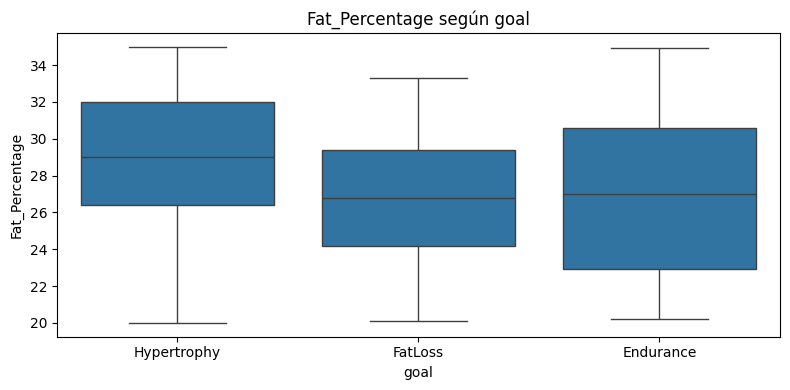

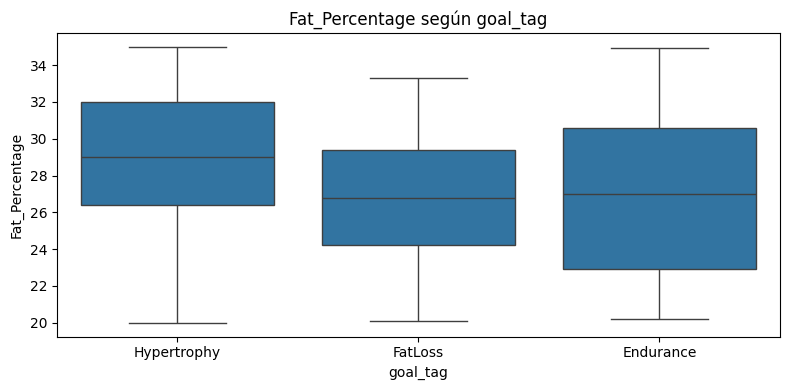

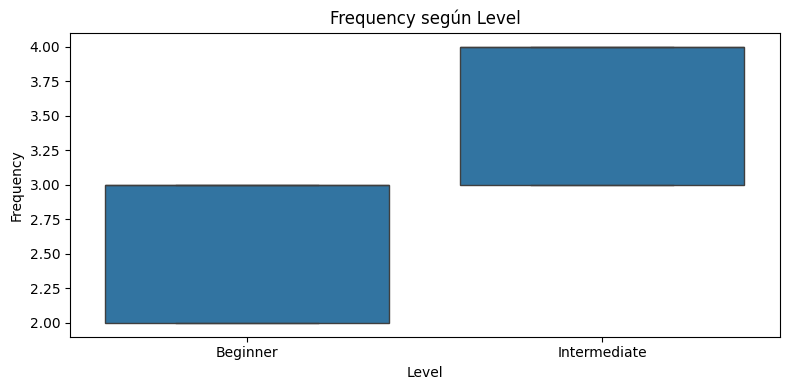

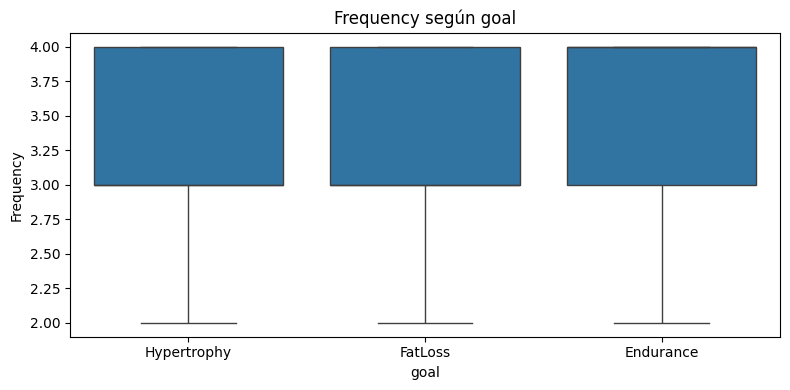

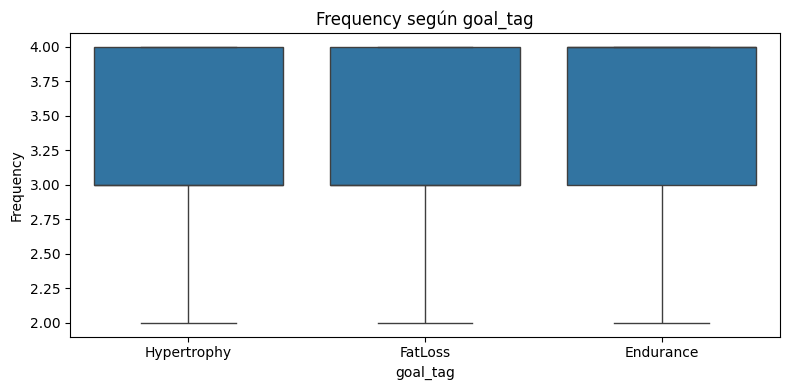

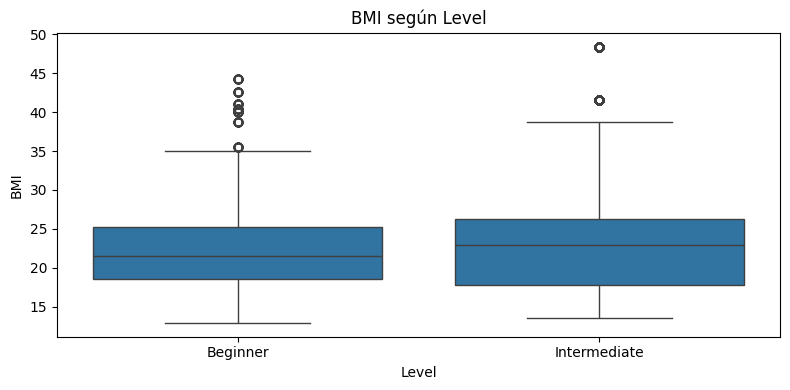

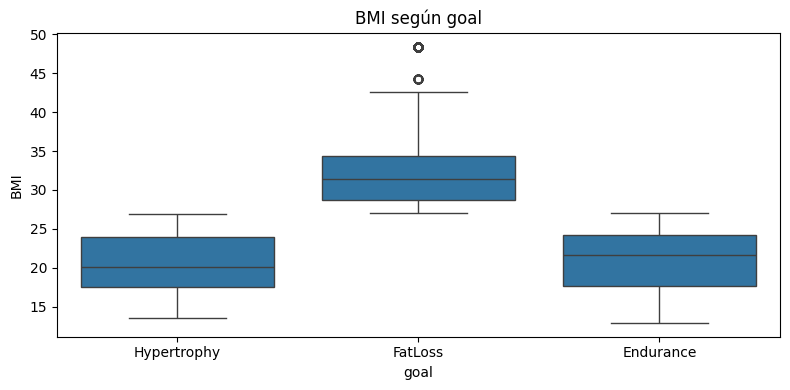

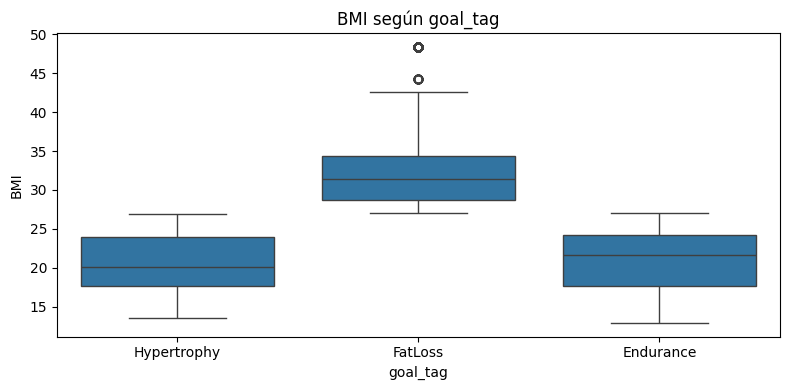

In [30]:
# Relación entre variables numéricas y categóricas principales
num_cols = SL.select_dtypes(include=['int64', 'float64']).columns
cat_cols = ['Level', 'goal', 'goal_tag'] if 'goal_tag' in SL.columns else ['Level', 'goal']

for num in num_cols:
    for cat in cat_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=SL, x=cat, y=num)
        plt.title(f'{num} según {cat}')
        plt.tight_layout()
        plt.show()

In [31]:
gym.head()

,Title,Type,BodyPart,Equipment,Level,BodyGroup,exercise_id,goal_tag,movement_type,equipment_std
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,Core,E00000,Endurance,Compound,Bands
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,Core,E00001,Endurance,Isolation,Bands
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,Core,E00002,Hypertrophy,Isolation,Bands
3,Banded crunch,Strength,Abdominals,Bands,Intermediate,Core,E00003,Endurance,Isolation,Bands
4,Crunch,Strength,Abdominals,Bands,Intermediate,Core,E00004,FatLoss,Isolation,Bands


In [32]:
members.head()

,Age,Gender,Weight_kg,Height_m,Workout_time,Calories_Burned,Type,Fat_Percentage,Frequency,Level,BMI,member_id,goal,equipment_access,injury
0,25,Male,53.2,1.70,0.59,532.0,Strength,28.8,3,Beginner,18.41,M0000,Hypertrophy,Home,NaN
1,38,Male,46.1,1.79,0.64,556.0,Strength,29.2,3,Beginner,14.39,M0001,Hypertrophy,Home,NaN
2,28,Male,121.7,1.94,1.03,719.0,Strength,28.9,4,Intermediate,32.34,M0002,FatLoss,BasicGym,Shoulder
3,39,Female,42.5,1.75,1.13,740.0,Strength,26.2,2,Beginner,13.88,M0003,Hypertrophy,Home,Knee
4,47,Female,66.8,1.75,1.13,742.0,Strength,32.8,3,Intermediate,21.81,M0004,Endurance,BasicGym,NaN


In [33]:
SL = members.merge(
    gym,
    left_on=['Level', 'goal'],
    right_on=['Level', 'goal_tag'],
    how='inner'
)

In [ ]:
# Realizamos el merge 
SL = members.merge(
    gym,
    left_on=['Level', 'goal'],
    right_on=['Level', 'goal_tag'],
    how='inner'
)

In [35]:
# Mostrar un par de filas de ejemplo
print(SL.head(10))

   Age Gender  Weight_kg  Height_m  Workout_time  Calories_Burned    Type_x  \
0   25   Male       53.2       1.7          0.59            532.0  Strength   
1   25   Male       53.2       1.7          0.59            532.0  Strength   
2   25   Male       53.2       1.7          0.59            532.0  Strength   
3   25   Male       53.2       1.7          0.59            532.0  Strength   
4   25   Male       53.2       1.7          0.59            532.0  Strength   
5   25   Male       53.2       1.7          0.59            532.0  Strength   
6   25   Male       53.2       1.7          0.59            532.0  Strength   
7   25   Male       53.2       1.7          0.59            532.0  Strength   
8   25   Male       53.2       1.7          0.59            532.0  Strength   
9   25   Male       53.2       1.7          0.59            532.0  Strength   

   Fat_Percentage  Frequency     Level  ...  injury  \
0            28.8          3  Beginner  ...     NaN   
1            28.8   

In [36]:
SL.head()

,Age,Gender,Weight_kg,Height_m,Workout_time,Calories_Burned,Type_x,Fat_Percentage,Frequency,Level,...,injury,Title,Type_y,BodyPart,Equipment,BodyGroup,exercise_id,goal_tag,movement_type,equipment_std
0,25,Male,53.2,1.7,0.59,532.0,Strength,28.8,3,Beginner,...,NaN,Dumbbell spell caster,Strength,Abdominals,Dumbbell,Core,E00040,Hypertrophy,Isolation,Dumbbell
1,25,Male,53.2,1.7,0.59,532.0,Strength,28.8,3,Beginner,...,NaN,Bosu Ball Cable Crunch With Side Bends,Strength,Abdominals,Cable,Core,E00154,Hypertrophy,Isolation,Cable
2,25,Male,53.2,1.7,0.59,532.0,Strength,28.8,3,Beginner,...,NaN,Cable Seated Crunch,Strength,Abdominals,Cable,Core,E00159,Hypertrophy,Isolation,Cable
3,25,Male,53.2,1.7,0.59,532.0,Strength,28.8,3,Beginner,...,NaN,Fire Hydrant,Strength,Abductors,Bodyweight,Legs,E00649,Hypertrophy,Isolation,Bodyweight
4,25,Male,53.2,1.7,0.59,532.0,Strength,28.8,3,Beginner,...,NaN,Wide-grip barbell curl,Strength,Biceps,Barbell,Upper Body,E00666,Hypertrophy,Isolation,Barbell


In [37]:
# Guardar el dataset combinado
SL.to_csv("C:/Users/josen/Documents/MASTER/TFM/SmartLifter.csv", index=False)